In [1]:
import tensorflow as tf

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import missingno
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pprint import pprint
%matplotlib inline

# Data Loading
we load the dataset and do some pre-processing

In [3]:
fname = 'las_condes.csv'
fpath = os.path.join(os.getcwd(), fname)
df = pd.read_csv(fpath, encoding='utf-8')

df.sort_values("year", inplace = True, ascending=False)
df = df.drop_duplicates(subset=['cod_com', 'cod_mz', 'cod_pr'], keep='first')

time_range = []
for year in range(2017, 2019):
    for semester in range(1, 3):
        time_range.append(f"{semester}-{year}")

df = df[df.periodo.isin(time_range)]

df = df[df['precio_uf']>5000]
df = df[df['precio_uf']<30000]

# for now, we are going to take in consideration just a single time period & houses only
#df = df[df['periodo']=='2-2018']
df = df[df['tipo'] == 'Casa']
#df = df[df['cod_destino'] == 'H']  # H: Habitacional

In [4]:
df

,year_mas_antiguo,year_construccion_mas_reciente,cod_material_predominante,calidad_ponderada,cod_com,cod_mz,cod_pr,periodo,periodo_cbr,tipo,...,metro,paradero_transantiago,parque_urbano,mall,multitienda,homecenter,supermercado,monumento_historico,year.1,semestre.1
35571,2016.0,2016.0,B,2.000000,15108,2987,943,2-2018,1-2017,Casa,...,3438.35,1427.79,489.24,1652.10,1783.32,2960.53,1783.32,3269.00,2020.0,2.0
35552,2005.0,2010.0,B,2.000000,15108,2716,26,2-2018,2-2018,Casa,...,3110.39,380.08,314.37,468.41,661.57,2966.25,661.57,2397.85,2020.0,2.0
35616,1998.0,2015.0,C,2.000000,15108,2600,147,2-2017,2-2015,Casa,...,3175.26,726.20,358.16,1416.94,1406.75,1328.24,1406.75,659.62,2020.0,2.0
35026,1972.0,2014.0,C,2.000000,15108,2378,11,2-2017,2-2017,Casa,...,567.45,171.65,47.56,1279.81,448.29,1430.12,448.29,707.23,2020.0,2.0
35106,1993.0,1993.0,C,2.000000,15108,2573,4,1-2018,1-2018,Casa,...,3329.19,136.51,418.64,586.43,716.48,2442.39,716.48,1353.78,2020.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17747,1955.0,1955.0,C,2.150685,15108,596,30,2-2018,2-2018,Casa,...,803.09,201.22,276.38,670.83,494.56,1715.09,494.56,1197.87,2020.0,2.0
17755,1990.0,1998.0,C,2.147139,15108,2900,25,2-2017,2-2017,Casa,...,2042.38,231.93,226.46,952.92,934.82,1860.47,934.82,1862.39,2020.0,2.0
17767,1996.0,2003.0,C,2.144737,15108,3066,7,2-2018,2-2018,Casa,...,1225.68,156.23,557.33,557.98,651.95,640.75,651.95,1096.05,2020.0,2.0
17723,1989.0,1989.0,C,2.159509,15108,2896,23,2-2018,2-2018,Casa,...,1918.18,300.97,472.28,910.74,865.50,1850.17,865.50,1736.98,2020.0,2.0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_mas_antiguo,1440.0,1.984203e+03,2.063992e+01,1.836000e+03,1.967000e+03,1.981000e+03,2.002000e+03,2.017000e+03
year_construccion_mas_reciente,1440.0,1.990019e+03,1.904014e+01,1.938000e+03,1.974000e+03,1.990500e+03,2.006000e+03,2.017000e+03
calidad_ponderada,1440.0,2.583230e+00,5.838997e-01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,4.474747e+00
cod_com,1440.0,1.510800e+04,0.000000e+00,1.510800e+04,1.510800e+04,1.510800e+04,1.510800e+04,1.510800e+04
cod_mz,1440.0,1.918101e+03,8.431891e+02,2.590000e+02,1.140000e+03,2.144500e+03,2.610250e+03,3.072000e+03
cod_pr,1440.0,7.825625e+01,1.542145e+02,1.000000e+00,1.200000e+01,2.500000e+01,6.400000e+01,9.650000e+02
m_const,1440.0,1.689222e+02,8.423643e+01,1.300000e+01,1.130000e+02,1.400000e+02,2.030000e+02,8.190000e+02
m_terreno,1440.0,3.813319e+02,3.329142e+02,0.000000e+00,2.310000e+02,3.035000e+02,4.552500e+02,4.537000e+03
m_terraza,1440.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
año_const,1440.0,1.984203e+03,2.063992e+01,1.836000e+03,1.967000e+03,1.981000e+03,2.002000e+03,2.017000e+03


## Data Cleansing

### NaN Removal

In [7]:
df.isna().sum()[df.isna().sum()>0]  # These are the variables that contain NaN values

consec_sanitaria             11
galpones                   1431
complementarias            1207
obras_civiles              1440
sup_terreno                 402
cod_com_bc                 1061
cod_mz_bc                  1061
cod_pr_bc                  1061
avaluo_fiscal_bc_clp       1062
porcentaje_co_propiedad    1061
posee_segundo_bc           1061
dtype: int64

In [6]:
df.drop('galpones', axis=1, inplace=True)
df.drop('obras_civiles', axis=1, inplace=True)
df.drop('sup_terreno', axis=1, inplace=True)
df.drop('complementarias', axis=1, inplace=True)

df.drop('cod_com_bc', axis=1, inplace=True)
df.drop('cod_mz_bc', axis=1, inplace=True)
df.drop('cod_pr_bc', axis=1, inplace=True)

# We fix the 'cod_material_predominante' using mode
material_type_mode = df['cod_material_predominante'].mode()[0]
df['cod_material_predominante'] = df['cod_material_predominante'].fillna(material_type_mode)

### Remove Unnecessary Variables

In [7]:
df.drop('latitud', axis=1, inplace=True)
df.drop('longitud', axis=1, inplace=True)

df.drop('nombre_zona_prc', axis=1, inplace=True)
df.drop('cod_zona_prc', axis=1, inplace=True)
df.drop('capa_prc', axis=1, inplace=True)

df.drop('consec_electrica', axis=1, inplace=True)
df.drop('direccion_cbr', axis=1, inplace=True)
df.drop('direccion', axis=1, inplace=True)

df.drop('periodo_cbr', axis=1, inplace=True)
df.drop('periodo', axis=1, inplace=True)

# As we are contemplating the same area we remove the following variables
df.drop('tipo', axis=1, inplace=True)
df.drop('cod_com', axis=1, inplace=True)
df.drop('cod_pr', axis=1, inplace=True)
# cod_mz is kept, so we can evaluate in different blocks of the commune


df.drop('semestre', axis=1, inplace=True)
df.drop('semestre.1', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)
df.drop('year.1', axis=1, inplace=True)
df.drop('verificada', axis=1, inplace=True)
df.drop('año', axis=1, inplace=True)
df.drop('mes', axis=1, inplace=True)
df.drop('cruce_perfecto', axis=1, inplace=True)
df.drop('cod_com.1', axis=1, inplace=True)
df.drop('cod_mz.1', axis=1, inplace=True)
df.drop('cod_pr.1', axis=1, inplace=True)

In [8]:
pprint(df.columns)

Index(['year_mas_antiguo', 'year_construccion_mas_reciente',
       'cod_material_predominante', 'calidad_ponderada', 'cod_mz', 'm_const',
       'm_terreno', 'm_terraza', 'año_const', 'precio_uf',
       'codigo_transaccion', 'tipo_transaccion', 'avaluo_fiscal_clp',
       'contrib_sem_clp', 'cod_destino', 'avaluo_exento_clp',
       'consec_sanitaria', 'dist_rellenos_sanitarios',
       'dist_vertederos_ilegales', 'construcciones_generales', 'cod_zona_ine',
       'cod_distrito_ine', 'avaluo_fiscal_bc_clp', 'porcentaje_co_propiedad',
       'posee_segundo_bc', 'colegio_1', 'colegio_2', 'colegio_3', 'colegio_4',
       'colegio_5', 'estab_1y2_snss', 'hospitales_privados',
       'hospitales_publicos', 'pdi', 'carabineros', 'metro',
       'paradero_transantiago', 'parque_urbano', 'mall', 'multitienda',
       'homecenter', 'supermercado', 'monumento_historico'],
      dtype='object')


### Correlation

<AxesSubplot:>

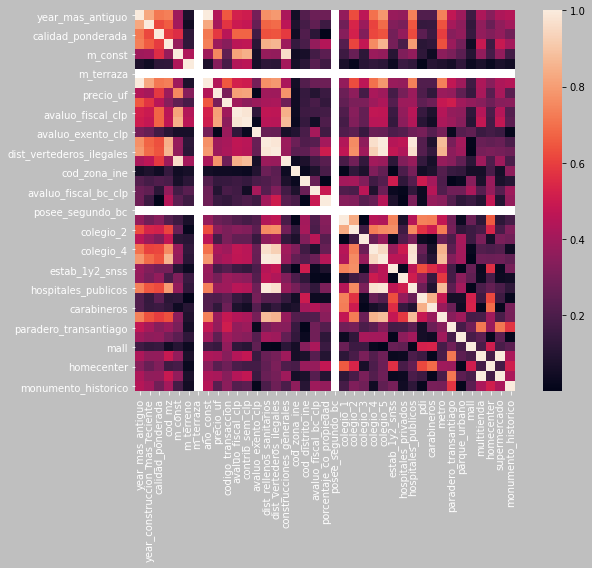

In [9]:
corrmat = df.corr().abs()
f, ax = plt.subplots(figsize=(10, 7))
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

f.patch.set_facecolor('#000000')
f.patch.set_alpha(0.25)

sn.heatmap(corrmat, square=True)

In [10]:
df.drop('m_terraza', axis=1, inplace=True)
df.drop('posee_segundo_bc', axis=1, inplace=True)
df.drop('year_mas_antiguo', axis=1, inplace=True)

### Discretization

In [11]:
msk = df.dtypes == np.object
# These are all columns that contain categorical information
categorical_variables = list(df.loc[:,msk].columns)
categorical_variables.append('cod_mz')
#df.drop('cod_mz', axis=1, inplace=True)
categorical_variables

['cod_material_predominante',
 'tipo_transaccion',
 'cod_destino',
 'consec_sanitaria',
 'cod_mz']

In [12]:
columns_pre = df.columns
df = pd.get_dummies(df, columns=categorical_variables, drop_first= True)
columns_after = df.columns
dummy_variables = list(set(columns_after) - set(columns_pre))

### Normalization

In [13]:
if False:
    data_scaler = preprocessing.MinMaxScaler()
    data_scaler.fit(df)
    sdf = data_scaler.transform(df)
    df = pd.DataFrame(sdf, columns=df.columns)  # Add again the column names

# Model

## Features Selection

In [14]:
features = [
    'año_const',
    'm_const',
    'm_terreno',
    #'construcciones_generales',
    'avaluo_fiscal_clp',
    'calidad_ponderada',
    'colegio_1',
    'colegio_2',
    'hospitales_publicos',
    'hospitales_privados',
    'supermercado',
    'paradero_transantiago',
    'mall',
    'parque_urbano',
    #'multitienda',  # multitienda omitted because of collinearity
    'homecenter',
    'precio_uf',
]
features +=  dummy_variables
df = df[features]
#df = pd.read_excel('filtered.xlsx')
#df = df[df['precio_uf']>5000]
#df = df[df['precio_uf']<30000]

## Export Dataset

In [15]:
#df.to_csv('stata.csv', index=False)

## Separate Training & Validation Datasets

In [16]:
training_dataset = df.sample(frac=0.8, random_state=0)
validation_dataset = df.drop(training_dataset.index)

features_training = training_dataset.drop(columns=['precio_uf'])
features_validation = validation_dataset.drop(columns=['precio_uf'])

labels_training = training_dataset[['precio_uf']]
labels_validation = validation_dataset[['precio_uf']]

## Model

In [17]:
model = tf.keras.Sequential()

# 16 & 8
shape = 16
model.add(tf.keras.layers.Dense(shape, activation='relu', input_shape=(features_training.shape[1],)))
model.add(tf.keras.layers.Dense(shape//2, activation='relu'))
model.add(tf.keras.layers.Dense(shape, activation='relu'))
model.add(tf.keras.layers.Dense(shape//2, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.optimizers.Adam(),
             loss='mean_squared_error',
             metrics=['mean_absolute_percentage_error'])

In [18]:
history = model.fit(features_training, labels_training,
                    epochs=15,
                    shuffle=True,
                    verbose=1,
                    #batch_size=150,
                    validation_data=(features_validation, labels_validation))

Epoch 1/15
36/36 [==============================] - 0s 9ms/step - loss: 17908670464.0000 - mean_absolute_percentage_error: 709.3524 - val_loss: 474717920.0000 - val_mean_absolute_percentage_error: 146.2059
Epoch 2/15
36/36 [==============================] - 0s 3ms/step - loss: 134053264.0000 - mean_absolute_percentage_error: 70.1716 - val_loss: 29642312.0000 - val_mean_absolute_percentage_error: 36.8368
Epoch 3/15
36/36 [==============================] - 0s 3ms/step - loss: 21381950.0000 - mean_absolute_percentage_error: 30.3365 - val_loss: 20940788.0000 - val_mean_absolute_percentage_error: 28.6170
Epoch 4/15
36/36 [==============================] - 0s 3ms/step - loss: 18594024.0000 - mean_absolute_percentage_error: 27.4585 - val_loss: 20713778.0000 - val_mean_absolute_percentage_error: 28.6470
Epoch 5/15
36/36 [==============================] - 0s 3ms/step - loss: 18434820.0000 - mean_absolute_percentage_error: 27.4434 - val_loss: 20602930.0000 - val_mean_absolute_percentage_error: 2

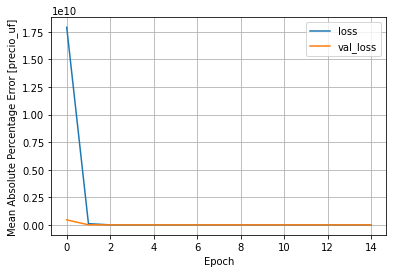

In [19]:
def plot_loss(history):
    x = 0
    plt.plot(history.history['loss'][x:], label='loss')
    plt.plot(history.history['val_loss'][x:], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Percentage Error [precio_uf]')
    plt.legend()
    plt.grid(True)
    
plot_loss(history)

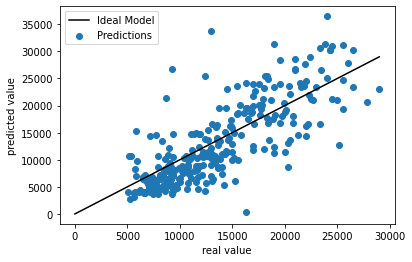

In [20]:
def plot_scatter(x, y):
    line = np.linspace(0, int(x.max())+1, 10)
    plt.scatter(x, y, label='Predictions')
    plt.plot(line, line, color='k', label='Ideal Model')
    plt.xlabel('real value')
    plt.ylabel('predicted value')
    plt.legend()

predicted = (model.predict(features_validation, batch_size=1))
plot_scatter(labels_validation.values, predicted)